In [1]:
import matplotlib.pyplot as plt
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from torch_geometric.loader import DataLoader
import sevenn

from modules.nn import SimplePeriodicNetwork
from modules.dataset import build_dataset, AtomsToGraphCollater
from modules.property_prediction import SevenNetPropertiesPredictor
from modules.train import validate_epoch



radial_cutoff = 5
batch_size = 10



dataset = build_dataset(csv_path = '../data/sevennet_slopes.csv')

Cache path set to "./cache". To change, set PFP_CACHE environment variable.


100%|██████████| 179/179 [00:00<00:00, 255.79it/s]


In [9]:
df = pd.read_csv('../data/sevennet_slopes.csv')
df['v1_Li_slope'] = df['v1_Li_slope'].clip(lower=1e-4)

In [11]:
cond_500 = df[df['temperature'] == 500]['v1_Li_slope'].to_list()
cond_1000 = df[df['temperature'] == 1000]['v1_Li_slope'].to_list()

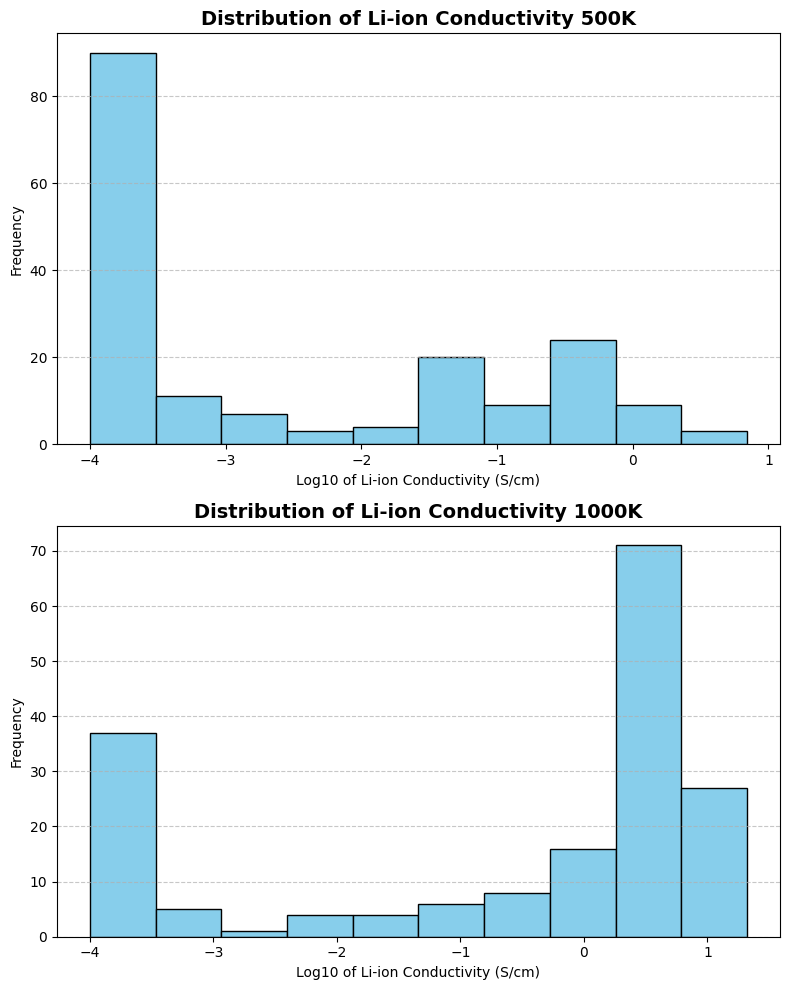

In [14]:
import numpy as np
import matplotlib.pyplot as plt


# Создаем холст с двумя подграфиками (в две строки и одну колонку)
fig, axes = plt.subplots(2, 1, figsize=(8, 10))  # 2 строки, 1 колонка

# Первый график
axes[0].hist(np.log10(cond_500), bins=10, color='skyblue', edgecolor='black')
axes[0].set_title("Distribution of Li-ion Conductivity 500K", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Log10 of Li-ion Conductivity (S/cm)")
axes[0].set_ylabel("Frequency")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Второй график
axes[1].hist(np.log10(cond_1000), bins=10, color='skyblue', edgecolor='black')
axes[1].set_title("Distribution of Li-ion Conductivity 1000K", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Log10 of Li-ion Conductivity (S/cm)")
axes[1].set_ylabel("Frequency")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Подгоняем макет, чтобы графики не накладывались
plt.tight_layout()

# Показываем графики
plt.show()
